In [53]:
!pip install praw

In [54]:
import praw
import networkx as nx
import matplotlib.pyplot as plt
import pickle

In [55]:
user_agent = "web:CS579:v1.0 (by u/Relevant-Fig-773)"

reddit = praw.Reddit(
    client_id="qy6TBi9qSnML8nLApahmvg",
    client_secret="_TjZdio3jXn7Gpy6e2ABszjNIBX02w",
    user_agent=user_agent,
)

In [56]:
import networkx as nx
import json

subreddit = reddit.subreddit("championsleague")
commenters = []
post_makers = []
directed_graph = nx.DiGraph()
undirected_graph = nx.Graph()
raw_data = {}

for submission in subreddit.hot(limit=20):
    submission_author = str(submission.author)
    directed_graph.add_node(submission_author, title=submission.title, type="post")
    undirected_graph.add_node(submission_author, title=submission.title, type="post")

    if submission_author not in raw_data:
        raw_data[submission_author] = []

    post_makers.append(submission_author)

    for comment in submission.comments:
        if comment.author:
            comment_author = str(comment.author)
            commenters.append(comment_author)

            directed_graph.add_node(comment_author, type="user")
            directed_graph.add_edge(comment_author, submission_author)

            undirected_graph.add_node(comment_author, type="user")
            undirected_graph.add_edge(comment_author, submission_author)

            raw_data[submission_author].append(comment_author)

with open("RAW_DATA_2_21_24.json", "w") as file:
    json.dump(raw_data, file)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [57]:
for u in commenters:
  print(u)

AutoModerator
ecross02
SeanContent
Sovereign444
AutoModerator
AutoModerator
Ukee_boy
AutoModerator
evansyakah
Bobberino94
Sad_Astronaut_7235
AutoModerator
Bt12v
AutoModerator
Positive_Big_2153
Mahery92
digitalfoe
doctorweiwei
Ok_Standard_3559
AutoModerator
Stunning_Web3509
SoerkelOne
AutoModerator
AutoModerator
AutoModerator
baldurcan
Whole-Ad-8494
Whole-Ad-8494
BenitoCamelas69420
No-Percentage-3380
AutoModerator
Felicks77
hector_cumbaya
Karman_K
Maleficent_Resolve44
Working_Radish_2726
Different-Attorney76
CrazyCockroachLady
EatUrNuggies
AutoModerator
AutoModerator
Automatic_Taro6005
Pow67
Kyyes
suchmos1
Lazywhale97
GuyIncognito211
CalTono
chrislpz
Small_Blueberry_7313
Mindless_Kenshi08
Ces_noix
Lifelemons9393
vegass67
Lermoninoff
souhailMeme
Hristianm
sufinomo
Dazzling-Yellow5395
DistinctRub2962
TheColoredFool
matheusaugomes
ElBravooo
pvt0
NUbeebskies
XuloMalacatones
ShouldersofGiants127
Wide_Challenge3880
fedenl
Joe1237
Vigotje123
killing_myvibe
DistinctRub2962
citizen2211994
king_d

In [58]:
for p in post_makers:
  print(p)

pumkinhat
Football_Discussions
cyclethepuck1
cyclethepuck1
aham_brahmasami
Icy_Independence7094
Football_Discussions
cyclethepuck1
cyclethepuck1
Football_Discussions
MessageOriginal7808
Football_Discussions
Single-Revenue-6587
OnGyattt
OnGyattt
Lizasugarluw
Football_Discussions
Football_Discussions
OnGyattt
Hopeful-Monk4959


In [59]:
print(len(commenters), len(set(commenters)))
print(len(post_makers), len(set(post_makers)))

all_users = post_makers + commenters
print(len(all_users), len(set(all_users)))

225 182
20 10
245 191


In [60]:
print(f"Size of network: {(len(undirected_graph.nodes))} nodes")
print(f"Size of network: {(len(undirected_graph.edges))} edges")

Size of network: 191 nodes
Size of network: 212 edges


In [61]:
colors = []
for node, attributes in undirected_graph.nodes(data=True):
    node_type = attributes.get('type', None)

    if node_type == 'post':
      colors.append('red')
    else:
      colors.append("skyblue")

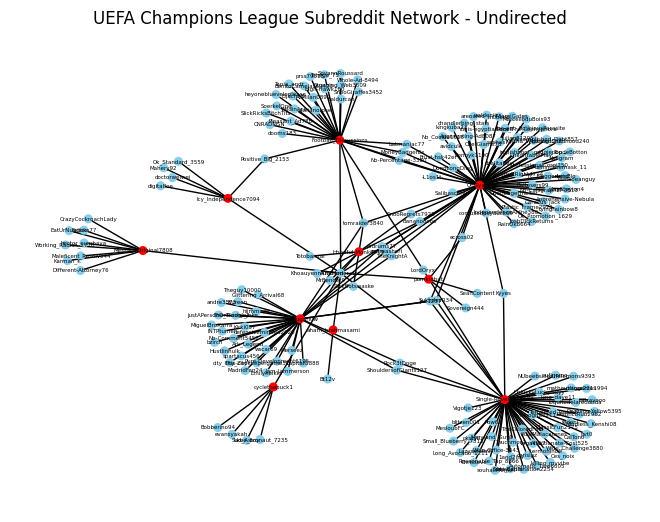

In [62]:
pos = nx.spring_layout(undirected_graph)
nx.draw(undirected_graph, pos, with_labels=True, font_size=4, node_size=30, node_color=colors, font_color="black")
plt.title("UEFA Champions League Subreddit Network - Undirected")
plt.show()

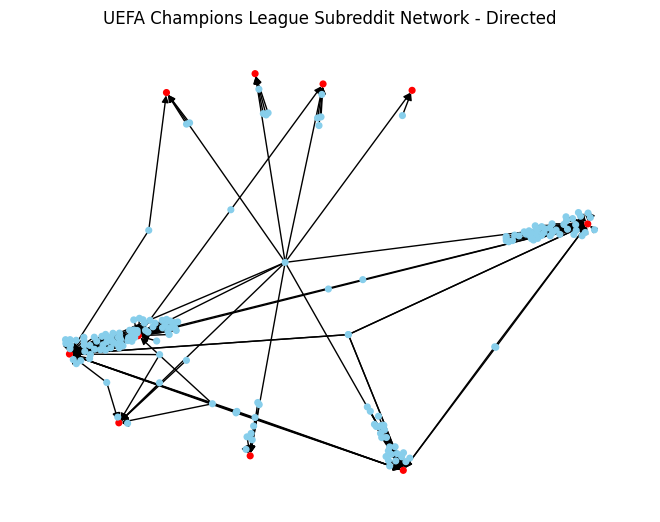

In [66]:
pos = nx.spring_layout(directed_graph)
nx.draw(directed_graph, pos, with_labels=False, font_size=4, node_size=17, node_color=colors, font_color="black")
plt.title("UEFA Champions League Subreddit Network - Directed")
plt.show()

# Network Metrics

In-Degree:
  pumkinhat: 4
  AutoModerator: 0
  ecross02: 0
  SeanContent: 0
  Sovereign444: 0
  Football_Discussions: 27
  cyclethepuck1: 5
  Ukee_boy: 0
  evansyakah: 0
  Bobberino94: 0
  Sad_Astronaut_7235: 0
  aham_brahmasami: 2
  Bt12v: 0
  Icy_Independence7094: 6
  Positive_Big_2153: 0
  Mahery92: 0
  digitalfoe: 0
  doctorweiwei: 0
  Ok_Standard_3559: 0
  Stunning_Web3509: 0
  SoerkelOne: 0
  baldurcan: 0
  Whole-Ad-8494: 0
  BenitoCamelas69420: 0
  No-Percentage-3380: 0
  MessageOriginal7808: 9
  Felicks77: 0
  hector_cumbaya: 0
  Karman_K: 0
  Maleficent_Resolve44: 0
  Working_Radish_2726: 0
  Different-Attorney76: 0
  CrazyCockroachLady: 0
  EatUrNuggies: 0
  Single-Revenue-6587: 52
  Automatic_Taro6005: 0
  Pow67: 0
  Kyyes: 0
  suchmos1: 0
  Lazywhale97: 0
  GuyIncognito211: 0
  CalTono: 0
  chrislpz: 0
  Small_Blueberry_7313: 0
  Mindless_Kenshi08: 0
  Ces_noix: 0
  Lifelemons9393: 0
  vegass67: 0
  Lermoninoff: 0
  souhailMeme: 0
  Hristianm: 0
  sufinomo: 0
  Dazzling-Yel

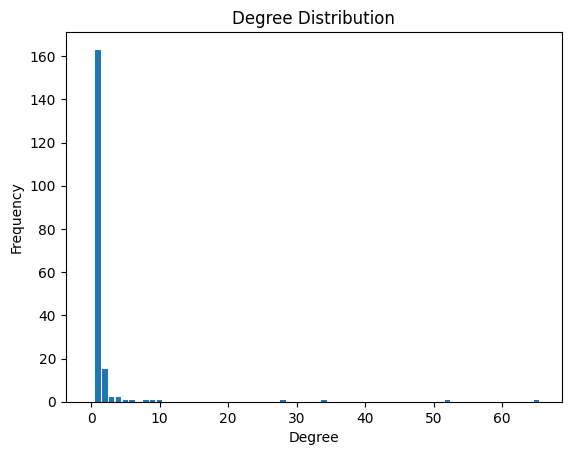

In [64]:
import matplotlib.pyplot as plt

in_degrees = directed_graph.in_degree()
out_degrees = directed_graph.out_degree()

pagerank = nx.pagerank(directed_graph)

closeness_centrality = nx.closeness_centrality(directed_graph)

print("In-Degree:")
for node, in_degree in in_degrees:
    print(f"  {node}: {in_degree}")

print("\nOut-Degree:")
for node, out_degree in out_degrees:
    print(f"  {node}: {out_degree}")

print("\nPagerank:")
for node, value in pagerank.items():
    print(f"  {node}: {value}")

print("\nCloseness Centrality:")
for node, value in closeness_centrality.items():
    print(f"  {node}: {value}")

degree_distribution = nx.degree_histogram(directed_graph)
plt.bar(range(len(degree_distribution)), degree_distribution, align="center")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()


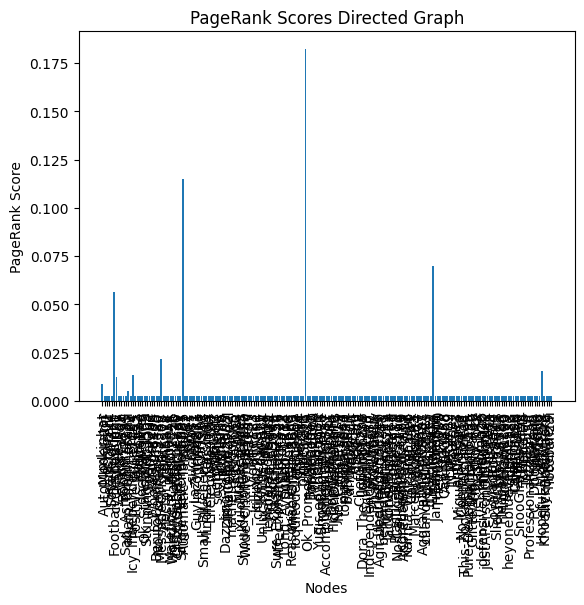

In [69]:
pagerank = nx.pagerank(directed_graph)

nodes = list(pagerank.keys())
scores = list(pagerank.values())

plt.bar(nodes, scores)
plt.xlabel('Nodes')
plt.ylabel('PageRank Score')
plt.title('PageRank Scores Directed Graph')
plt.xticks(rotation=90)
plt.show()

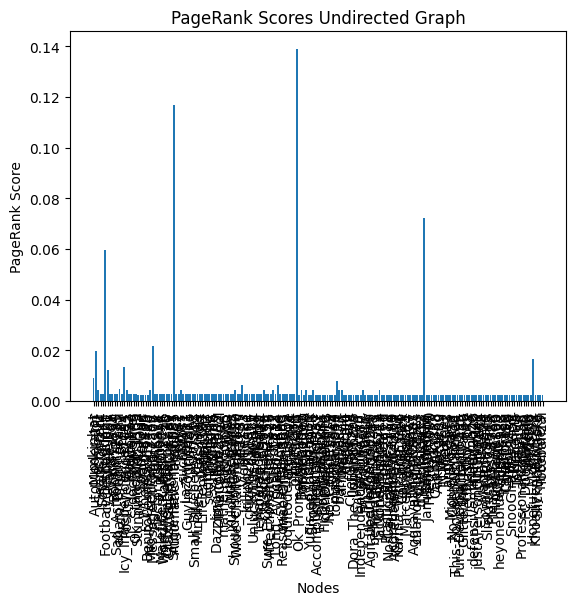

In [70]:
pagerank = nx.pagerank(undirected_graph)

nodes = list(pagerank.keys())
scores = list(pagerank.values())

plt.bar(nodes, scores)
plt.xlabel('Nodes')
plt.ylabel('PageRank Score')
plt.title('PageRank Scores Undirected Graph')
plt.xticks(rotation=90)
plt.show()